Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


Understand the Dataset Structure

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.shape

(1000, 9)

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Data Cleaning & Preparation

In [7]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create Month column for time series analysis
df['Month'] = df['Date'].dt.to_period('M')

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


Check for Missing Values

In [8]:
df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0
Month,0


In [ ]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18
Month,13


Descriptive Statistics

In [9]:
df[['Quantity', 'Price per Unit', 'Total Amount']].describe()


,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.000000
mean,2.514000,179.890000,456.000000
std,1.132734,189.681356,559.997632
min,1.000000,25.000000,25.000000
25%,1.000000,30.000000,60.000000
50%,3.000000,50.000000,135.000000
75%,4.000000,300.000000,900.000000
max,4.000000,500.000000,2000.000000


In [ ]:
print("\nMode for numerical columns:")
print("Age mode:", df['Age'].mode()[0])
print("Quantity mode:", df['Quantity'].mode()[0])
print("Price per Unit mode:", df['Price per Unit'].mode()[0])
print("Total Amount mode:", df['Total Amount'].mode()[0])


Mode for numerical columns:
Age mode: 43
Quantity mode: 4
Price per Unit mode: 50
Total Amount mode: 50


Time Series Analysis (Monthly Sales)

In [10]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales


,Total Amount
Month,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


Line Plot – Monthly Sales Trend

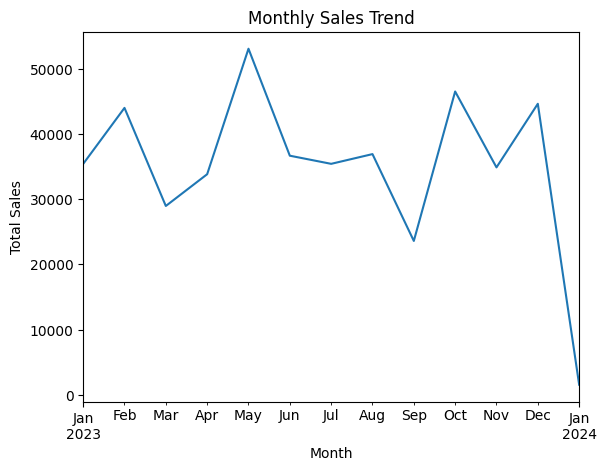

In [11]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Scatter Plot

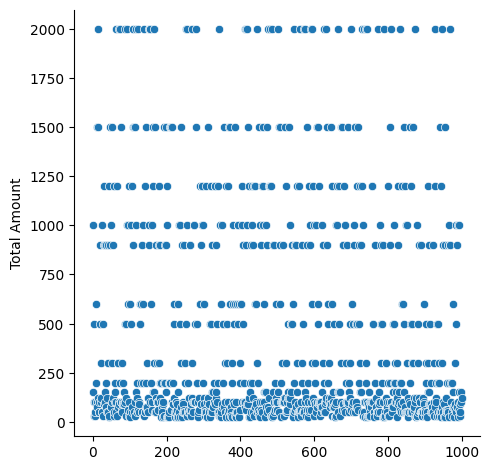

In [12]:
sns.relplot(data=df['Total Amount'],kind='scatter')

In [13]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


<Axes: xlabel='Product Category', ylabel='count'>

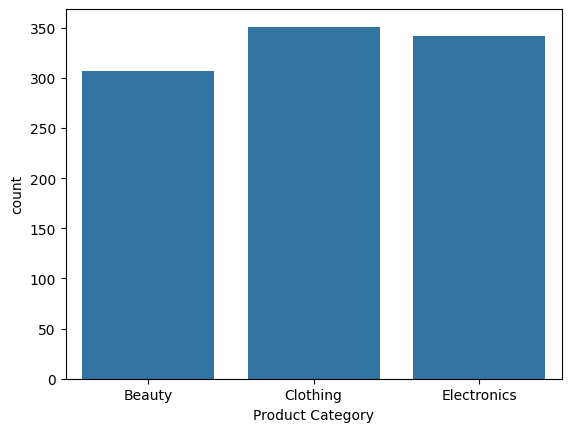

In [14]:
sns.countplot(x=df['Product Category'])

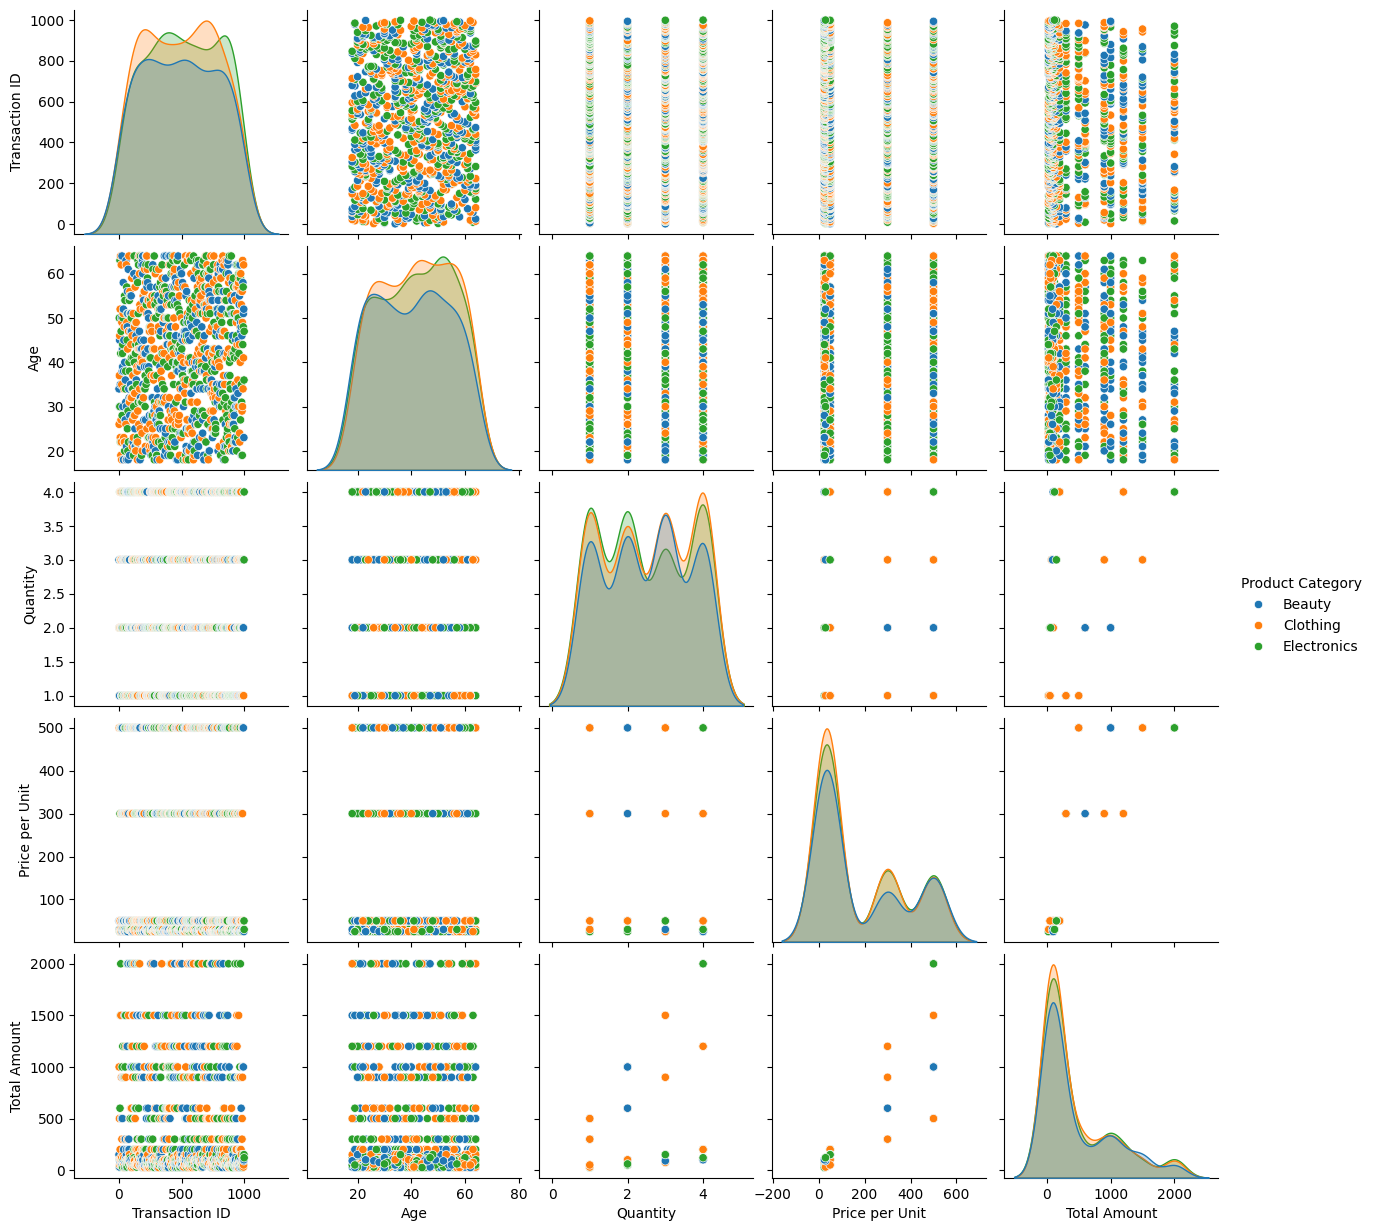

In [15]:
sns.pairplot(data=df,hue="Product Category")

In [16]:
grp = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
print(grp)

                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


In [17]:
cat = df["Product Category"].value_counts()
cat

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


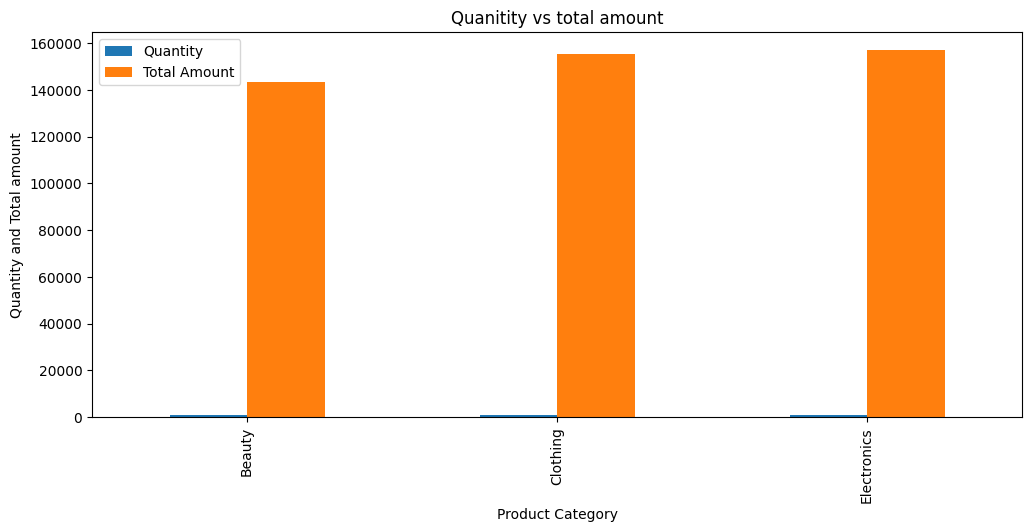

In [18]:
grp.plot(kind='bar',figsize=(12,5))
plt.title("Quanitity vs total amount")
plt.ylabel("Quantity and Total amount")
plt.show()

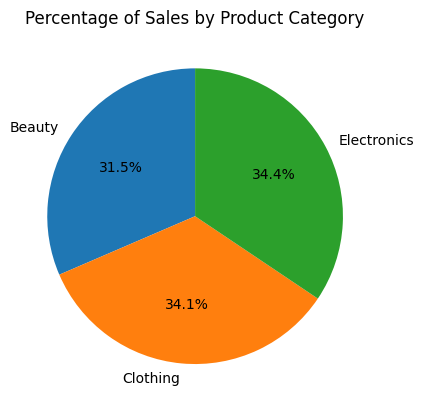

In [20]:
import matplotlib.pyplot as plt

# Group data by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum()

# Create pie chart
plt.figure()
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Percentage of Sales by Product Category")
plt.show()


In [21]:
# Descriptive statistics for Gender
print("\nDescriptive Statistics for Gender:")

# Frequency counts
gender_counts = df['Gender'].value_counts()
print("Frequency Counts:")
print(gender_counts)

# Mode
mode_gender = df['Gender'].mode()[0]
print("\nMode Gender:", mode_gender)

# Proportions
gender_proportions = df['Gender'].value_counts(normalize=True) * 100
print("\nProportions (%):")
print(gender_proportions)


Descriptive Statistics for Gender:
Frequency Counts:
Gender
Female    510
Male      490
Name: count, dtype: int64

Mode Gender: Female

Proportions (%):
Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64


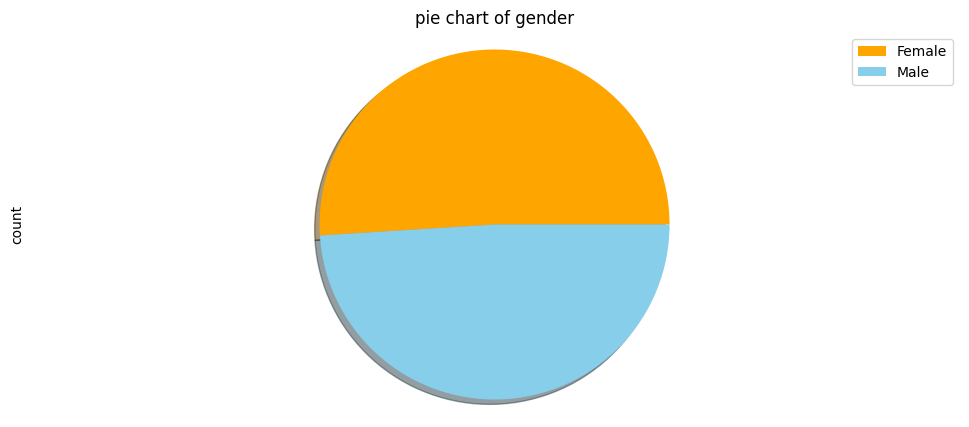

In [22]:
gender_counts.plot(kind="pie",figsize=(12,5),shadow=True, labels=None,colors=["orange","skyblue"])
gender_list = ['Female', 'Male']
plt.title("pie chart of gender")
plt.axis("equal")
plt.legend(labels=gender_list,loc="upper right")
plt.show()

In [23]:
print(df["Price per Unit"].corr(df["Total Amount"]))

0.8519248403554022


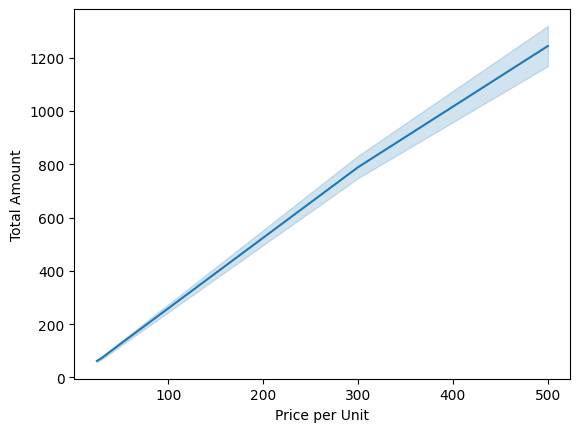

In [24]:
sns.lineplot(x="Price per Unit",y="Total Amount",data=df)
plt.show()

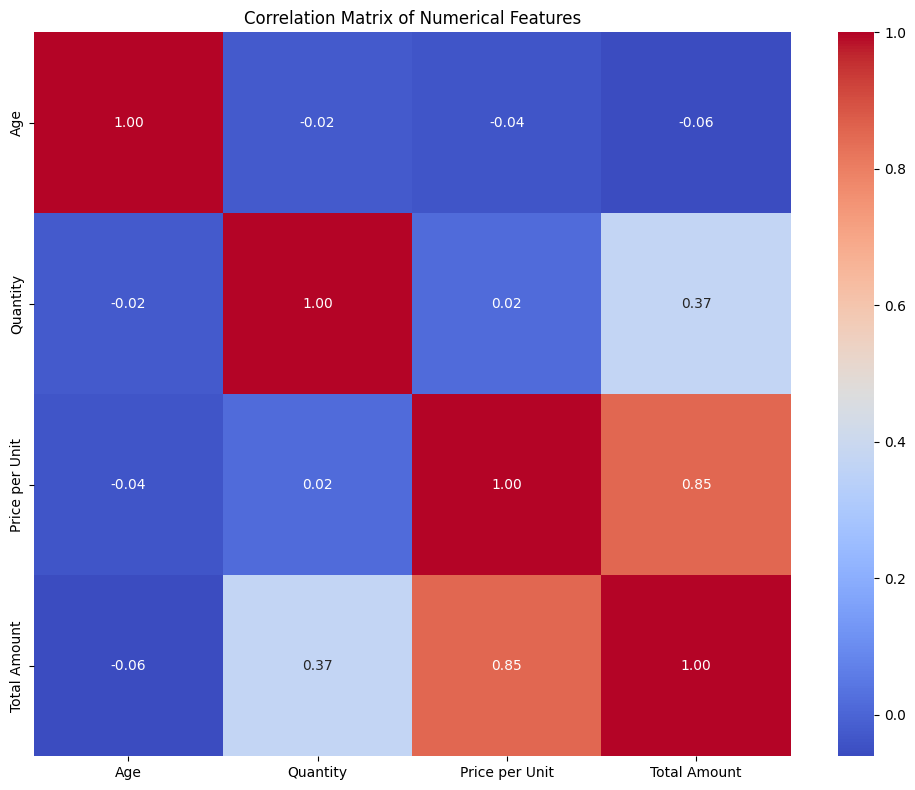

In [25]:
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()